In [1]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%pip install scikit-posthocs


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats as st
import scikit_posthocs as sp
sns.set(rc={'figure.figsize':(10,10)})

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# %pip install scipy --upgrade



In [5]:


df = pd.read_excel (r'/content/drive/MyDrive/Colab Notebooks/Astm/patients asthme bronchique.xlsx')
df.rename(columns={'Chitotriosidase (nmol/mL/h)': 'CHIT1', 'Vitamine D\n(ng/mL)': '25-OH-vit D', 'Eosinophiles (/μl) ': 'PNEo', 'Déficit en\nvitamine D': 'Déficit en vitamine D'}, inplace=True)
df.tail()

,No,Sexe,Age (mois),Milieu rural/urbain,Contrôle de l'asthme,Dermatite atopique,Rhinite allergique,PNEo,25-OH-vit D,Déficit en vitamine D,CHIT1
126,127,F,29.0,U,Totalement contrôlé,Oui,Non,30,21.5,Présent,250
127,128,M,35.0,U,Totalement contrôlé,Oui,Oui,140,30.8,Absent,300
128,129,M,54.0,R,Totalement contrôlé,Non,Non,670,36.5,Absent,230
129,130,M,46.0,U,Totalement contrôlé,Oui,Non,460,35.7,Absent,380
130,131,F,39.0,R,Totalement contrôlé,Oui,Non,30,46.8,Absent,370


In [6]:
# remove patient over 18 years old - not relevant for the dataset - majority of subjects are minors

df[df["Age (mois)"] > 300].index.values.astype(int)[0]
df.drop(54, axis = 0, inplace=True)


In [7]:
# remove column number
df.drop('No', axis=1, inplace=True)

In [8]:
df['Milieu rural/urbain'] = df['Milieu rural/urbain'].str.strip()

In [9]:
categ_cols= df.select_dtypes(include=['object']).columns.tolist()
cont_cols = list(set(df.columns) - set(df[categ_cols]))
categ_cols

['Sexe',
 'Milieu rural/urbain',
 "Contrôle de l'asthme",
 'Dermatite atopique',
 'Rhinite allergique',
 'Déficit en vitamine D']

In [10]:
display(df[categ_cols].describe().T)
display(df[cont_cols].describe().T)

,count,unique,top,freq
Sexe,130,2,M,70
Milieu rural/urbain,130,2,U,99
Contrôle de l'asthme,130,4,Partiellement contrôlé,58
Dermatite atopique,130,2,Oui,75
Rhinite allergique,130,2,Non,100
Déficit en vitamine D,130,2,Absent,68


,count,mean,std,min,25%,50%,75%,max
25-OH-vit D,130.0,30.386538,13.246907,9.98,21.5,27.45,37.45,69.8
Age (mois),130.0,63.255692,42.211784,12.30,29.0,53.50,83.00,197.0
PNEo,130.0,308.538462,327.610829,10.00,110.0,205.00,400.00,2170.0
CHIT1,130.0,483.538462,196.176086,150.00,380.0,475.00,620.00,990.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

Index(['Sexe', 'Age (mois)', 'Milieu rural/urbain', 'Contrôle de l'asthme',
       'Dermatite atopique', 'Rhinite allergique', 'PNEo', '25-OH-vit D',
       'Déficit en vitamine D'],
      dtype='object')
['Sexe', 'Milieu rural/urbain', "Contrôle de l'asthme", 'Dermatite atopique', 'Rhinite allergique', 'Déficit en vitamine D']
['25-OH-vit D', 'Age (mois)', 'PNEo', 'CHIT1']


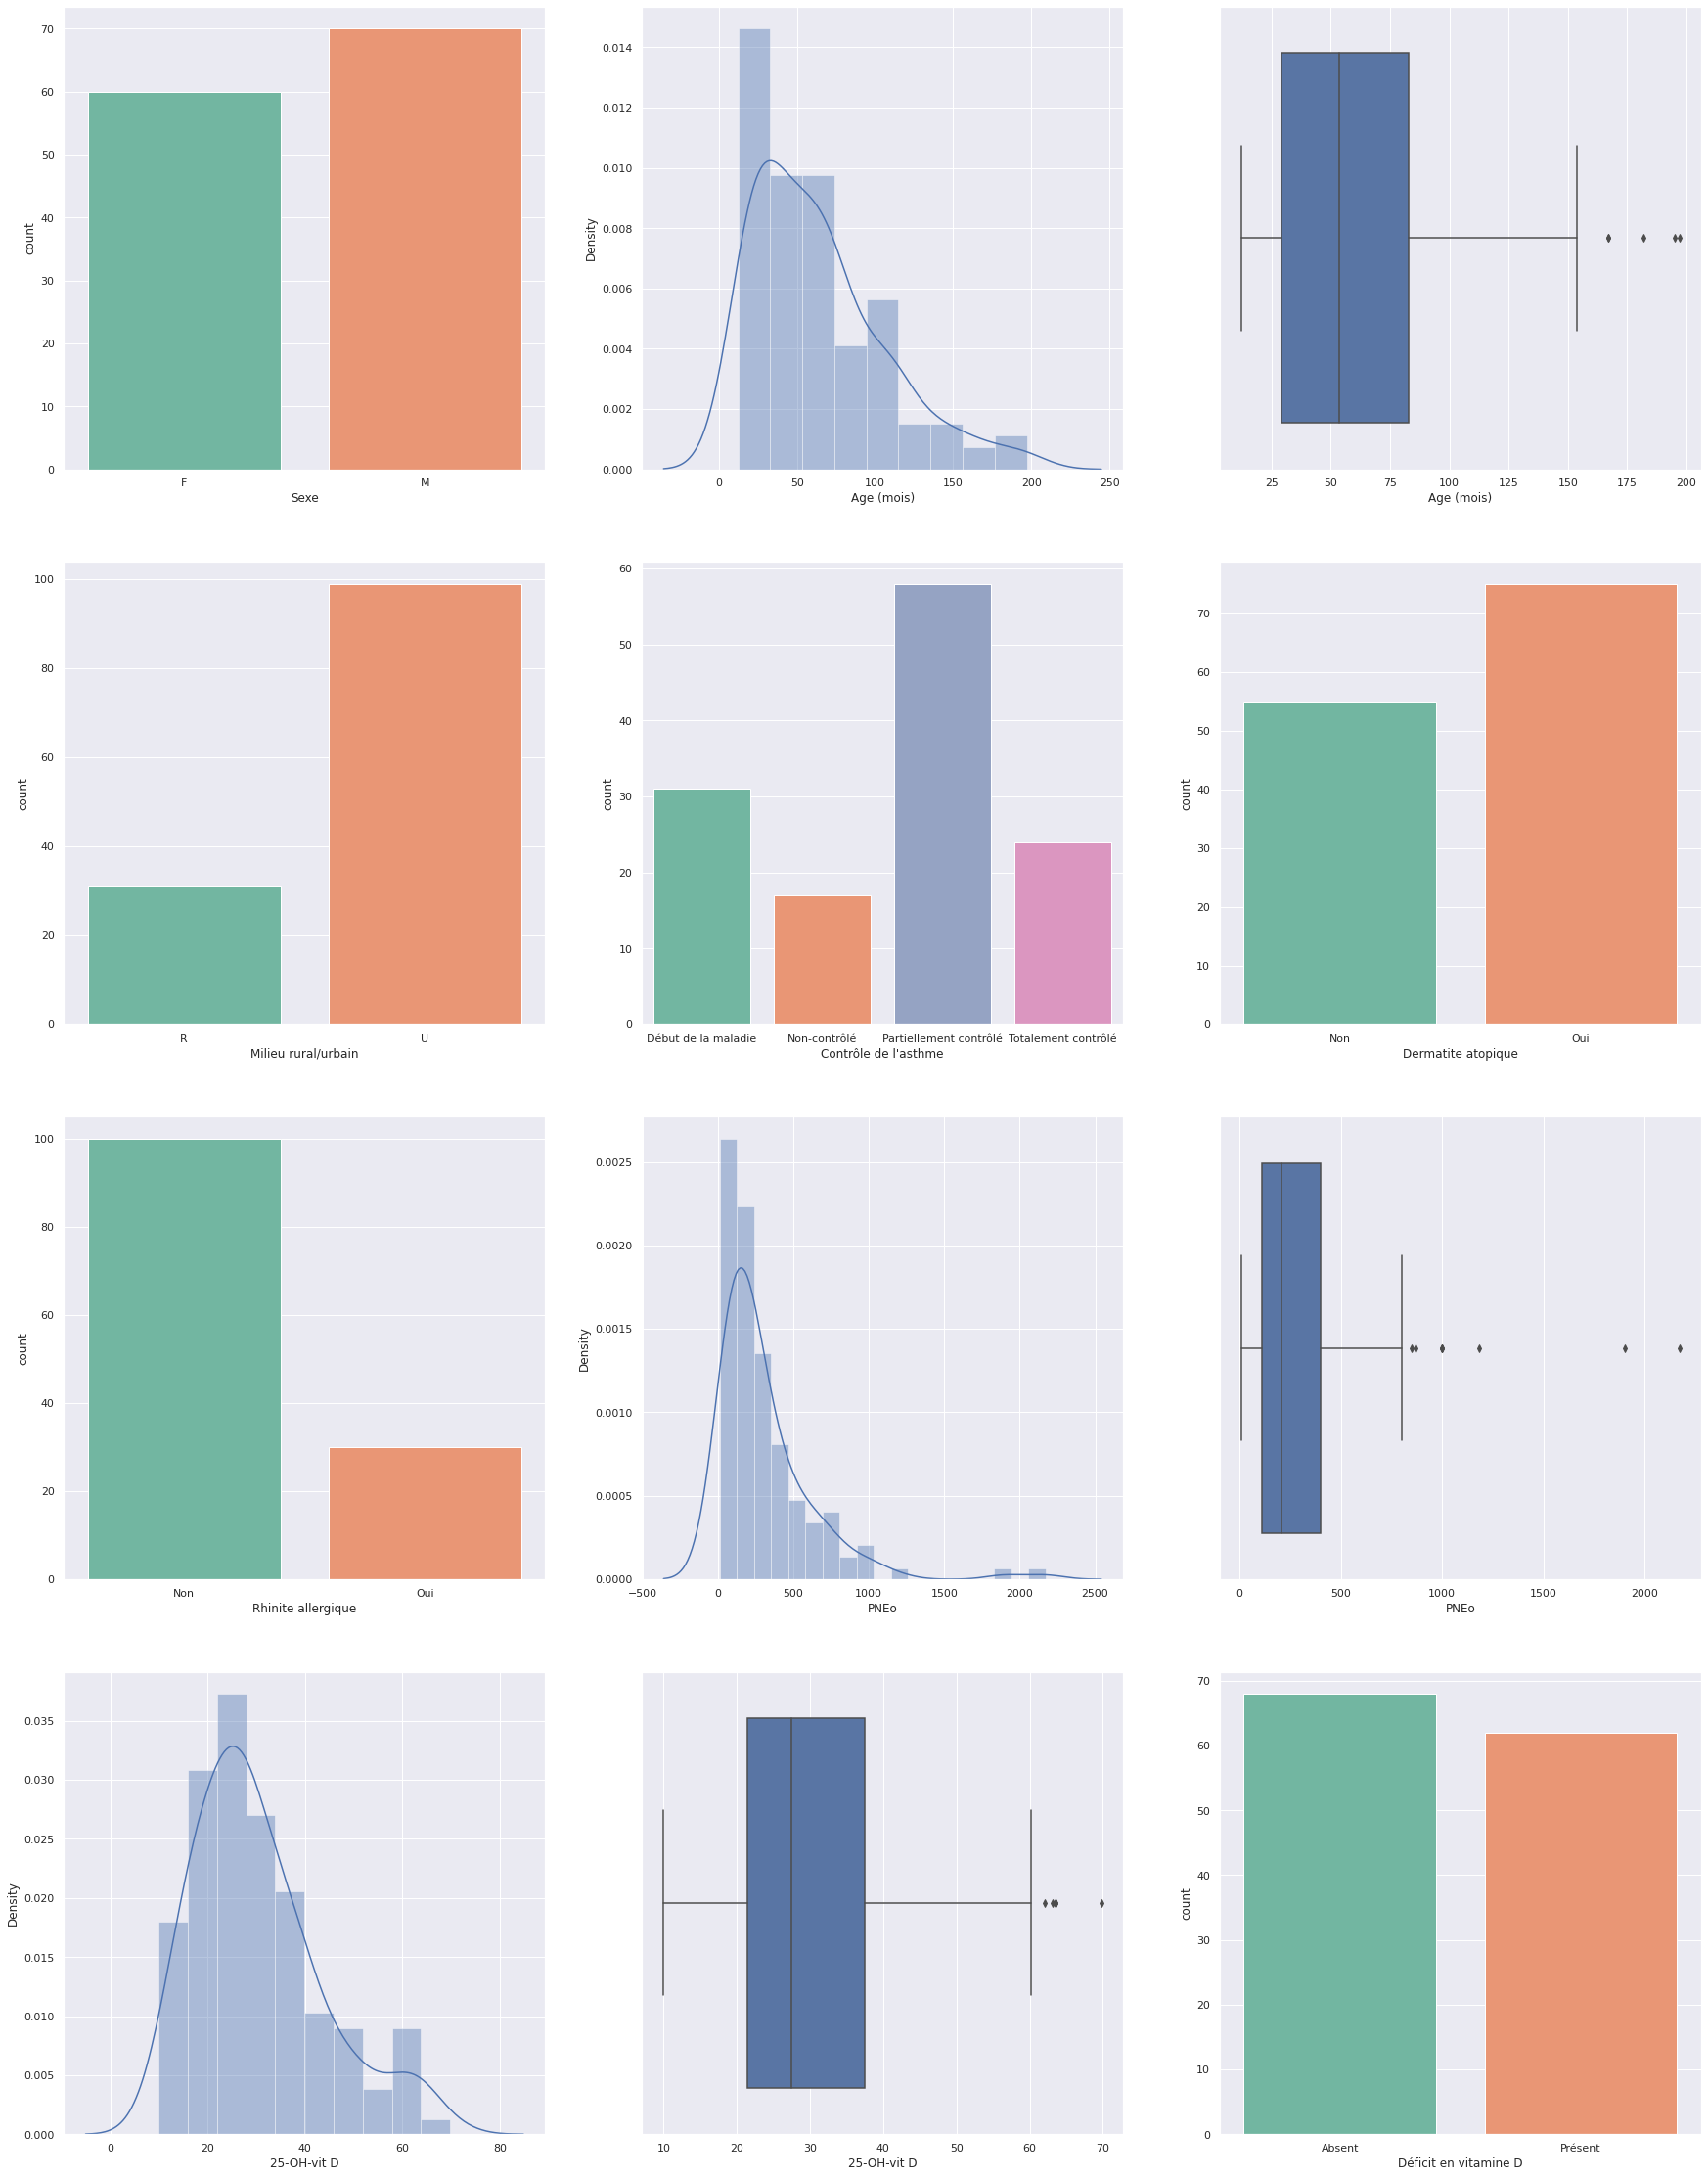

In [11]:
# reprezentare grafica a datelor

i = 0
j = 0
ncol = 3
nrow = 4
all_cols = df.columns.drop('CHIT1')

fig,axes=plt.subplots(nrows=nrow,ncols=ncol,figsize=(30,40))

for col in all_cols:
  if col in categ_cols:
    sns.countplot(x=col, data=df, ax=axes[i, j], palette="Set2")
  elif col in cont_cols:
    sns.distplot(df[col], ax=axes[i, j])
    if j < ncol-1:
      j += 1
    else:
      j = 0
      if i < nrow-1:
        i += 1
      else:
        i = 0
    sns.boxplot(df[col], ax=axes[i, j])
  if j < ncol-1:
    j += 1
  else:
    j = 0
    if i < nrow-1:
      i += 1
    else:
      i = 0
print(all_cols)
print(categ_cols)
print(cont_cols)
plt.show()

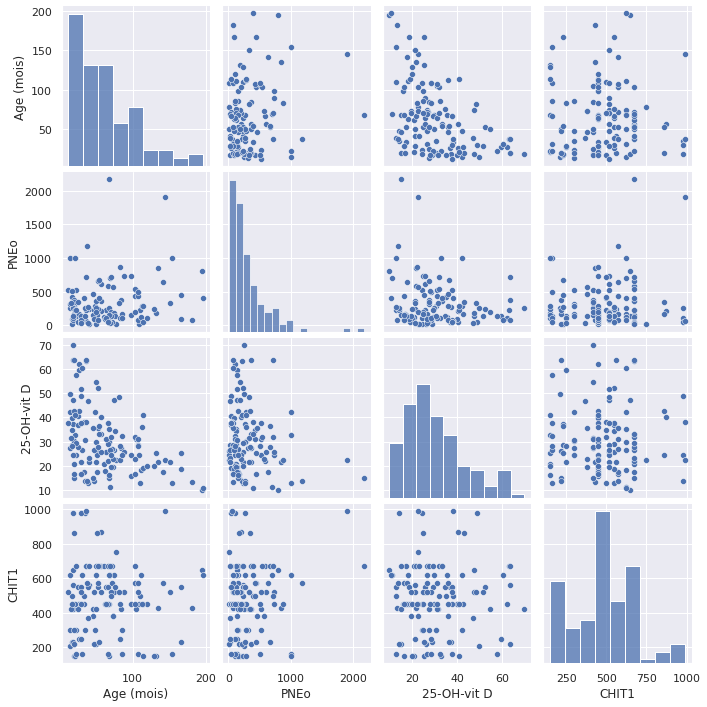

In [12]:
sns.pairplot(df)
plt.show()

### Table with the patient distribution by:
1. age
2. atopic deramtitis
3. rhinitis
4. astma control

#### 1. Distribution of patients by Age

In [13]:
def get_num_people_by_age_category(df):
    df["age_group"] = pd.cut(x=df['Age (mois)'], bins=[0,30,60,100], labels=["young","middle_aged","old"])
    return df

# Call function
df = get_num_people_by_age_category(df)


In [14]:
bins= [0,72,144,216,300]
labels = ['1-6 ans ','6-12 ans ','12-18 ans ','> 18 ans ']
df['Groupe d’âge'] = pd.cut(df['Age (mois)'], bins=bins, labels=labels, right=False)
print(df["Groupe d’âge"].value_counts())

1-6 ans       87
6-12 ans      35
12-18 ans      8
> 18 ans       0
Name: Groupe d’âge, dtype: int64


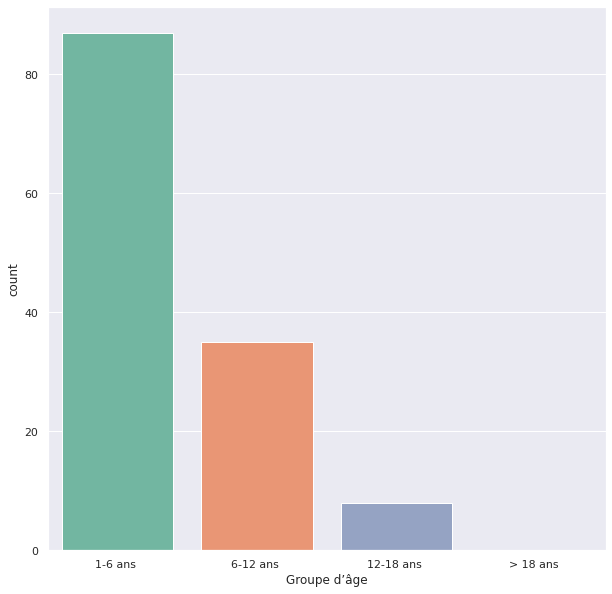

In [15]:
sns.countplot(x="Groupe d’âge", data=df, palette="Set2")
plt.rcParams['figure.figsize']=(10, 10)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


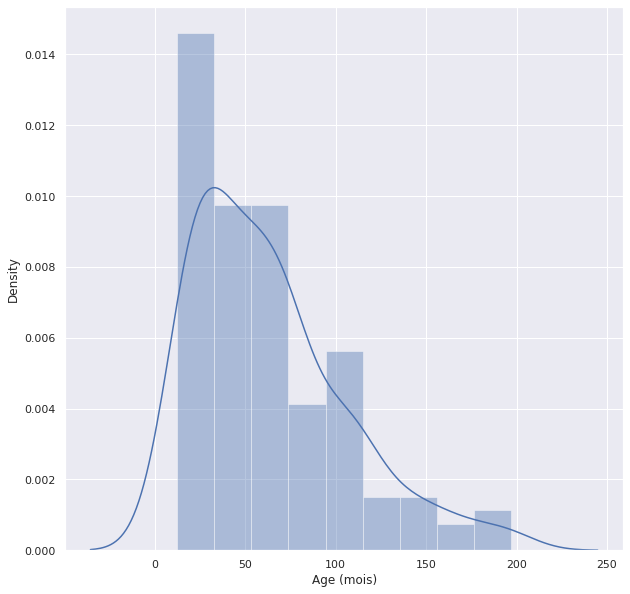

In [16]:
sns.distplot(df["Age (mois)"])
plt.rcParams['figure.figsize']=(8,8)
plt.show()

#### 2. Distribution of patients by Dermatite atopique

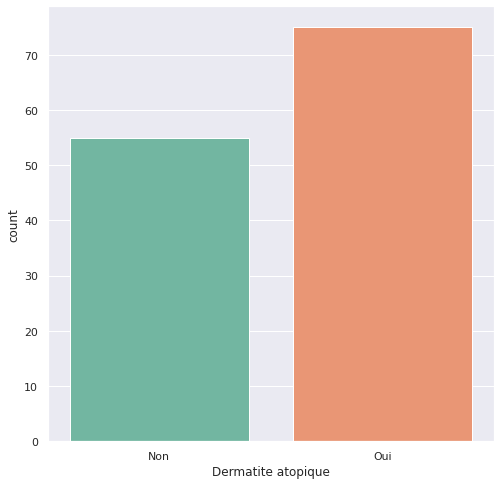

In [17]:
sns.countplot(x="Dermatite atopique", data=df, palette="Set2")
plt.rcParams['figure.figsize']=(10,10)
plt.show()

In [18]:
df["Dermatite atopique"].value_counts()

Oui    75
Non    55
Name: Dermatite atopique, dtype: int64

#### 3. Distribution of patients by Rhinite allergique

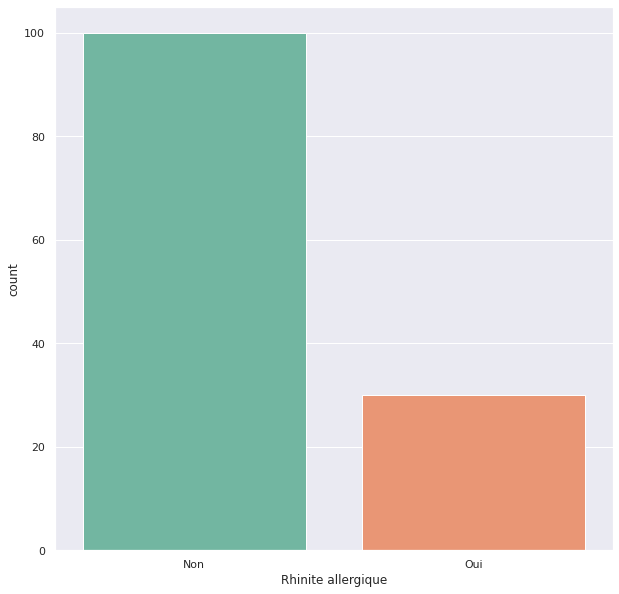

In [19]:
sns.countplot(x="Rhinite allergique", data=df, palette="Set2")
plt.rcParams['figure.figsize']=(10,10)
plt.show()

In [20]:
df["Rhinite allergique"].value_counts()

Non    100
Oui     30
Name: Rhinite allergique, dtype: int64

### 4. Distribution of patients by Asthma Control


In [21]:
df["Contrôle de l'asthme"].value_counts()

Partiellement contrôlé    58
Début de la maladie       31
Totalement contrôlé       24
Non-contrôlé              17
Name: Contrôle de l'asthme, dtype: int64

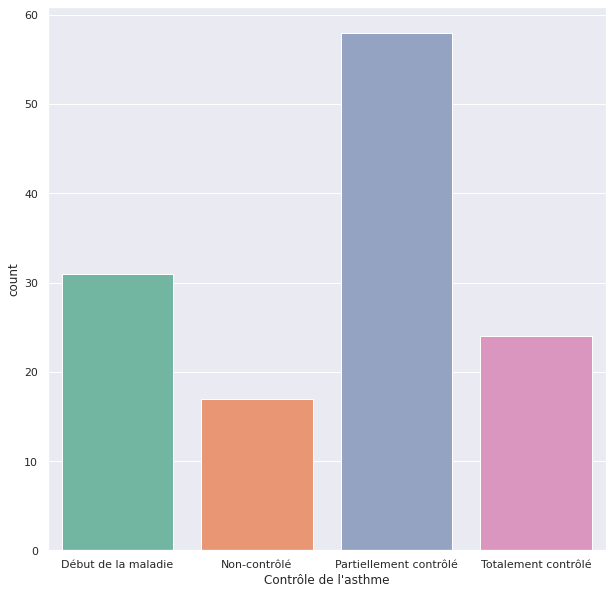

In [22]:
sns.countplot(x="Contrôle de l'asthme", data=df, palette="Set2")
plt.rcParams['figure.figsize']=(10, 10)
plt.show()

## Distribution Graphs according to Asthma Control




In [23]:
def plot_var(df, col_name, full_name, continuous):
    """
    Visualize a variable with and without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    if continuous == True:
      f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    else:
      f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=(12,3), dpi=90)


    
    # Plot without outcome
    if continuous:
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    # Plot with loan status
    if continuous:
        sns.boxplot(x=col_name, y="Contrôle de l'asthme", data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + " en fonction du Contrôle de l'asthme")
    else:
        charge_off_rates = df.groupby(col_name)["Contrôle de l'asthme"].value_counts(normalize=True).loc[:,'Partiellement contrôlé']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        charge_off_rates = df.groupby(col_name)["Contrôle de l'asthme"].value_counts(normalize=True).loc[:,'Début de la maladie']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax3)
        charge_off_rates = df.groupby(col_name)["Contrôle de l'asthme"].value_counts(normalize=True).loc[:,'Totalement contrôlé']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax4)
        charge_off_rates = df.groupby(col_name)["Contrôle de l'asthme"].value_counts(normalize=True).loc[:,'Non-contrôlé']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax5)
        ax2.set_ylabel("Contrôle de l'asthme")
        ax2.set_title("Contrôle de l'asthme" + full_name)
    ax2.set_xlabel(full_name)
    
    plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

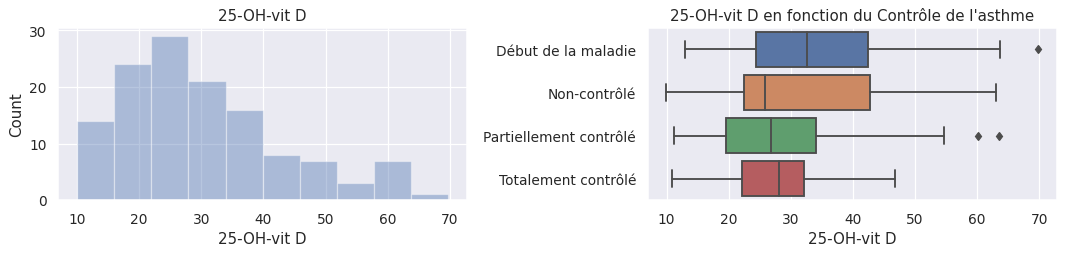

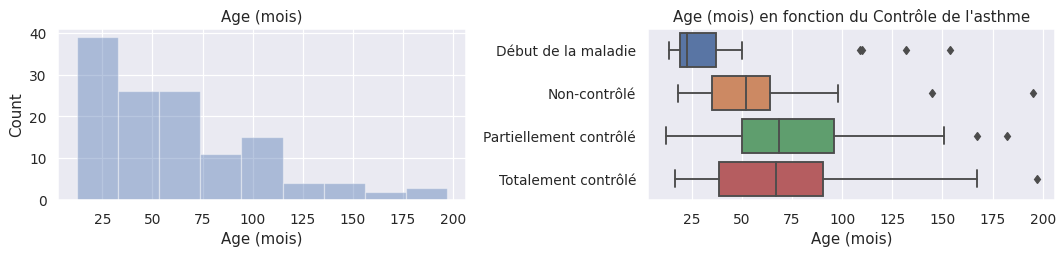

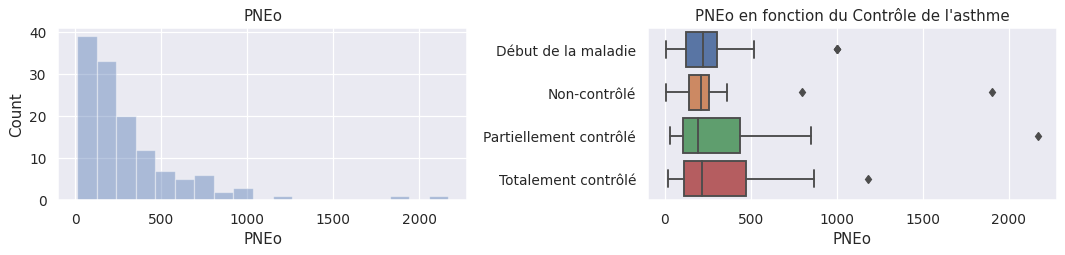

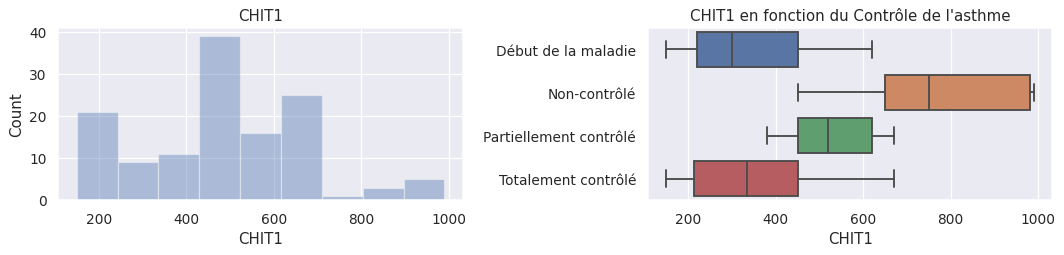

In [24]:
for col in cont_cols:
  plot_var(df, col, col, continuous=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

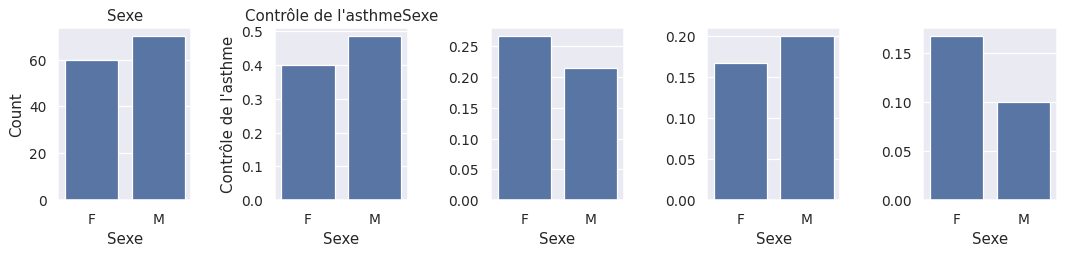

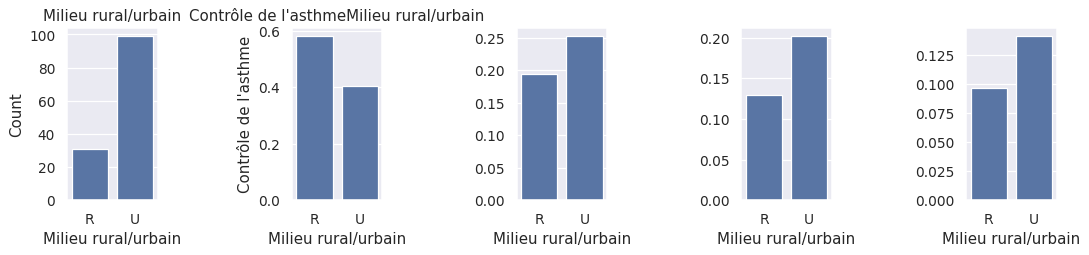

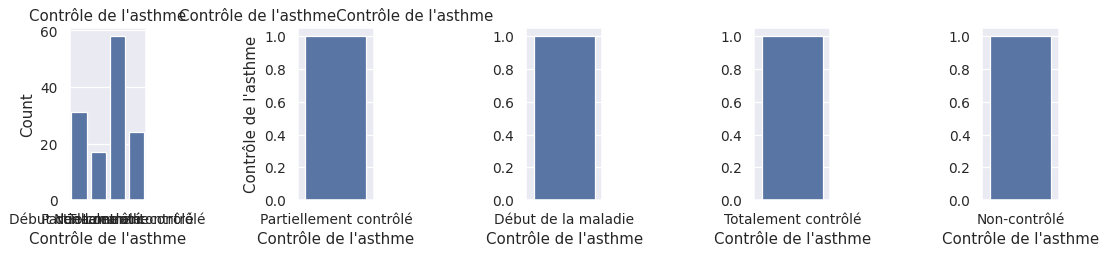

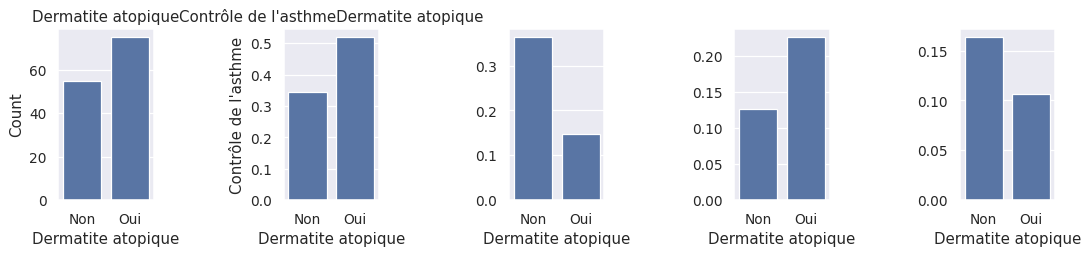

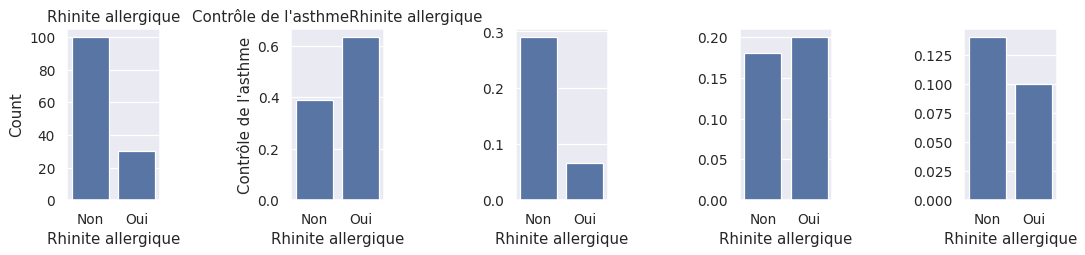

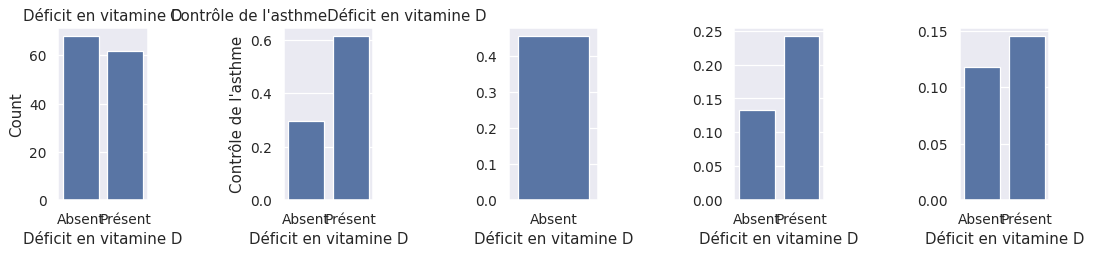

In [25]:
for col in categ_cols:
  plot_var(df, col, col, continuous=False)

### Pearson Correlation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


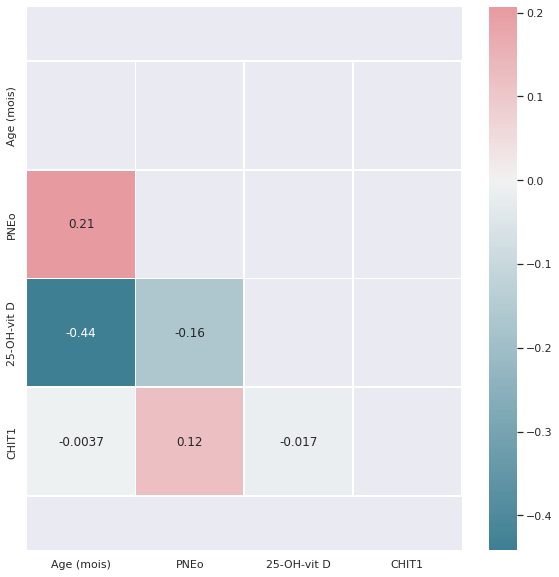

In [26]:
# Pearson's correlation

f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(),mask=np.triu(np.ones_like(df.corr(),dtype=np.bool)),center=0,annot=True,ax=ax,
            cmap=sns.diverging_palette(220, 10, as_cmap=True),linewidth=.5,square=True)
sns.set(rc = {'figure.figsize':(10,10)})
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)


plt.show()

In [27]:
def spearman_correlation(df):
    corrmat = df.corr(method='spearman')
    top_corr_features = corrmat.index


    # Visualise a lower-triangle correlation heatmap
    mask_df = np.triu(np.ones(corrmat.shape)).astype(np.bool)
    plt.figure(figsize=(10,8))
    #plot heat map
    g=sns.heatmap(df[top_corr_features].corr(), 
                  mask = mask_df, 
                  vmin = -1,
                  vmax = 1,
                  annot=True,
                  cmap="RdBu")

### Spearman Correlation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


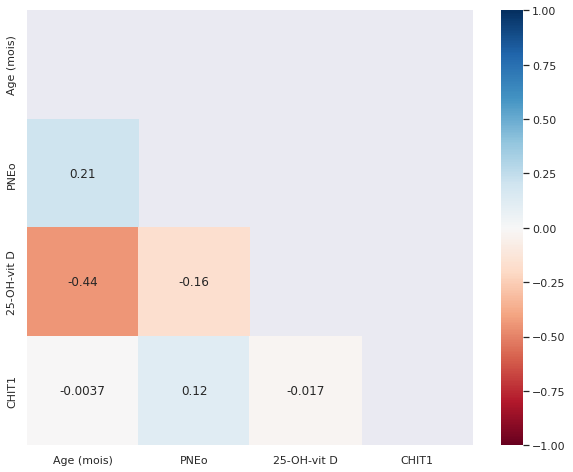

In [28]:
spearman_correlation(df)

In [77]:
def hyp_test( disease, disease_value_positive,disease_value_negative,  df,col, eq_var, alternativeType):
  yes = df[df[disease] == disease_value_positive][col]
  no = df[df[disease] == disease_value_negative][col]
  print('\n',col)
  display(st.ttest_ind(yes, no, equal_var=eq_var, alternative=alternativeType))
  return st.ttest_ind(yes, no, equal_var=eq_var, alternative=alternativeType)

# T-test - atopic dermatitis - eosinophilia

Comparison between the average values ​​of eosinophilia according to the presence of atopic dermatitis (Student test)

H0: mean values of eosinophilia for patients with atopic dermatitis are lower than or equal to mean values of eosinophilia for patients without atopic dermatitis 

H1: mean values of eosinophilia for patients with atopic dermatitis are higher than mean values of eosinophilia for patients without atopic dermatitis 

In [30]:
def variance_testing (df, col):
  yes = df[df["Dermatite atopique"] == 'Oui'][col]
  no = df[df["Dermatite atopique"] == 'Non'][col]
  display(st.levene(yes, no, center='median', proportiontocut=0.05))


In [31]:
variance_testing(df, 'PNEo')

LeveneResult(statistic=1.9269226405268005, pvalue=0.16750684150394615)

p value > 0.05 variances are equal for the t-test

In [78]:
p_dermatite_Eos = hyp_test("Dermatite atopique", 'Oui', 'Non', df, 'PNEo', True, 'greater')
p_dermatite_Eos[1]


 PNEo


Ttest_indResult(statistic=1.4085979729399039, pvalue=0.08068926771563036)

0.08068926771563036

## p value > 0.05 that means that mean values of eosinophilia for patients with atopic dermatitis are lower than or equal to mean values of eosinophilia for patients without atopic dermatitis


# T-test - atopic dermatitis - Chitotriosidase (nmol/mL/h)


Comparison between the average values ​​of Chitotriosidase (nmol/mL/h) according to the presence of atopic dermatitis (Student test)

H0: mean values of Chitotriosidase (nmol/mL/h) for patients with atopic dermatitis are lower than or equal to mean values of Chitotriosidase (nmol/mL/h) for patients without atopic dermatitis 

H1: mean values of Chitotriosidase (nmol/mL/h) for patients with atopic dermatitis are higher than mean values of Chitotriosidase (nmol/mL/h) for patients without atopic dermatitis 

In [33]:
variance_testing(df, 'CHIT1')

LeveneResult(statistic=4.766422038011433, pvalue=0.03084387639457948)

### p value < 0.05 means that the variances differ for the 2 groups

In [86]:
p_dermatite_Chit =hyp_test("Dermatite atopique", 'Oui', 'Non', df, 'CHIT1', False, 'greater')


 CHIT1


Ttest_indResult(statistic=1.9204469362877419, pvalue=0.02876638313287219)

## p value < 0.05 means that the  values of Chitotriosidase (nmol/mL/h) for patients with atopic dermatitis are higher than mean values of Chitotriosidase (nmol/mL/h) for patients without atopic dermatitis 

# T-test - atopic dermatitis - VitD

Comparison between the average values ​​of vitamin D according to the presence of atopic dermatitis (Student test)

H0: mean values of vitamin D for patients with atopic dermatitis are equal to or higher than the mean values of vitamin D for patients without atopic dermatitis 

H1: mean values of vitamin D for patients with atopic dermatitis are lower than mean values of vitamin D for patients without atopic dermatitis 

In [35]:
variance_testing(df, '25-OH-vit D')

LeveneResult(statistic=0.38528405879226557, pvalue=0.5358924519952234)

p value > 0.05 means that variances are equal for the t-test

In [85]:
p_dermatite_VitD =hyp_test("Dermatite atopique", 'Oui', 'Non', df, '25-OH-vit D', True, 'less')


 25-OH-vit D


Ttest_indResult(statistic=-0.34310381793438516, pvalue=0.3660416070259252)

## p value > 0.05 that means that mean values of vitamin D for patients with atopic dermatitis are equal to or higher than the mean values of vitamin D for patients without atopic dermatitis


# T-test - allergic rhinitis - Chitotriosidase (nmol/mL/h)


Comparison between the average values ​​of Chitotriosidase (nmol/mL/h) according to the presence of allergic rhinitis (Student test)

H0: mean values of Chitotriosidase (nmol/mL/h) for patients with allergic rhinitis are lower than or equal to mean values of Chitotriosidase (nmol/mL/h) for patients without allergic rhinitis 

H1: mean values of Chitotriosidase (nmol/mL/h) for patients with allergic rhinitis are higher than mean values of Chitotriosidase (nmol/mL/h) for patients without allergic rhinitis 

In [87]:
p_rhinite_Chit =hyp_test("Rhinite allergique", 'Oui', 'Non', df, 'CHIT1', True, 'greater')



 CHIT1


Ttest_indResult(statistic=0.9694755315812631, pvalue=0.16706816189448825)

## p value > 0.05 => mean values of chitotriosidase for patients with allergic rhinitis are lower than or equal to mean values of chitotriosidase for patients without allergic rhinitis 

# T-test - allergic rhinitis - eosinophilia

Comparison between the average values ​​of eosinophilia according to the presence of allergic rhinitis (Student test)

H0: mean values of eosinophilia for patients with allergic rhinitis are lower than or equal to mean values of eosinophilia for patients without allergic rhinitis 

H1: mean values of eosinophilia for patients with allergic rhinitis are higher than mean values of eosinophilia for patients without allergic rhinitis 

In [88]:
p_rhinite_Eos = hyp_test("Rhinite allergique", 'Oui', 'Non', df, 'PNEo', True, 'greater')



 PNEo


Ttest_indResult(statistic=0.7700701148996332, pvalue=0.2213386034330465)

## p value > 0.05 => mean values of eosinophilia for patients with allergic rhinitis are lower than or equal to mean values of eosinophilia for patients without allergic rhinitis 

# T-test - Allergic rhinitis - VitD

Comparison between the average values ​​of vitamin D according to the presence of Allergic rhinitis (Student test)

H0: mean values of vitamin D for patients with Allergic rhinitis are equal to or higher than the mean values of vitamin D for patients without Allergic rhinitis 

H1: mean values of vitamin D for patients with Allergic rhinitis are lower than mean values of vitamin D for patients without Allergic rhinitis 

In [89]:
p_rhinite_vitD =hyp_test("Rhinite allergique", 'Oui', 'Non', df, '25-OH-vit D', True, 'less')



 25-OH-vit D


Ttest_indResult(statistic=-2.0488817393613, pvalue=0.021258701973415915)

## p value < 0.05 that means that mean values of vitamin D for patients with allergic rhinitis are lower than the mean values of vitamin D for patients without allergic rhinitis

# ANOVA

In [40]:
df['Contrôle de la maladie asthmatique'] = df["Contrôle de l'asthme"].replace({"Début de la maladie": 1, "Partiellement contrôlé" : 2,  "Totalement contrôlé": 3, "Non-contrôlé":4})
df

,Sexe,Age (mois),Milieu rural/urbain,Contrôle de l'asthme,Dermatite atopique,Rhinite allergique,PNEo,25-OH-vit D,Déficit en vitamine D,CHIT1,age_group,Groupe d’âge,Contrôle de la maladie asthmatique
0,F,14.0,R,Début de la maladie,Non,Non,250,49.5,Absent,210,young,1-6 ans,1
1,F,27.0,U,Début de la maladie,Non,Non,140,59.4,Absent,250,young,1-6 ans,1
2,F,27.0,U,Début de la maladie,Oui,Non,110,62.1,Absent,450,young,1-6 ans,1
3,F,23.0,R,Début de la maladie,Non,Non,520,24.4,Absent,300,young,1-6 ans,1
4,M,17.0,U,Début de la maladie,Non,Non,20,28.7,Absent,230,young,1-6 ans,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,F,29.0,U,Totalement contrôlé,Oui,Non,30,21.5,Présent,250,young,1-6 ans,3
127,M,35.0,U,Totalement contrôlé,Oui,Oui,140,30.8,Absent,300,middle_aged,1-6 ans,3
128,M,54.0,R,Totalement contrôlé,Non,Non,670,36.5,Absent,230,middle_aged,1-6 ans,3
129,M,46.0,U,Totalement contrôlé,Oui,Non,460,35.7,Absent,380,middle_aged,1-6 ans,3


## ANOVA for Eosinophiles
 Verify the variances between the 4 asthma control groups  for Eosinophiles

In [41]:
eos1 = df[df["Contrôle de la maladie asthmatique"] == 1]['PNEo']
eos2 = df[df["Contrôle de la maladie asthmatique"] == 2]['PNEo']
eos3 = df[df["Contrôle de la maladie asthmatique"] == 3]['PNEo']
eos4 = df[df["Contrôle de la maladie asthmatique"] == 4]['PNEo']

# # Levene's Test in Python with Scipy:
stat, p = st.levene(eos1, eos2, eos3, eos4)

print(stat, p)

0.19845204453399226 0.8972783585832412


### variances for Eosinophiles are equal across all groups of asthma controll


In [52]:
p_anova_eos = st.f_oneway(
    df["PNEo"][df["Contrôle de la maladie asthmatique"] == 1],
    df["PNEo"][df["Contrôle de la maladie asthmatique"] == 2],
    df["PNEo"][df["Contrôle de la maladie asthmatique"] == 3],
    df["PNEo"][df["Contrôle de la maladie asthmatique"] == 4]
)
p_anova_eos[1]

0.9509503808825265

### ANOVA for Eosinophile - p value > 0.05  = >  the means of  Eosinophile levels are equal across all groups of asthma controll

## ANOVA for Vitamine D 

Verify the variances between the 4 asthma control groups for Vitamine D

In [43]:
eos1 = df[df["Contrôle de la maladie asthmatique"] == 1]['25-OH-vit D']
eos2 = df[df["Contrôle de la maladie asthmatique"] == 2]['25-OH-vit D']
eos3 = df[df["Contrôle de la maladie asthmatique"] == 3]['25-OH-vit D']
eos4 = df[df["Contrôle de la maladie asthmatique"] == 4]['25-OH-vit D']

# # Levene's Test in Python with Scipy:
stat, p = st.levene(eos1, eos2, eos3, eos4)

print(stat, p)

4.055168802484683 0.00864723369110139


### p value < 0.05 =>  variances for Vitamine D are not equal across all groups of asthma controll

## Since the variances for the  Vit D are different for ANOVA classsic we need to test the ANOVA post hoc to find the differences between groups of asthma control to see how the groups of asthma differ in terms of vit D and enzime values


In [50]:
sp.posthoc_ttest(df, val_col='25-OH-vit D', group_col="Contrôle de l'asthme",equal_var=False, p_adjust='holm')

,Début de la maladie,Non-contrôlé,Partiellement contrôlé,Totalement contrôlé
Début de la maladie,1.000000,1.0,0.188605,0.125446
Non-contrôlé,1.000000,1.0,1.000000,1.000000
Partiellement contrôlé,0.188605,1.0,1.000000,1.000000
Totalement contrôlé,0.125446,1.0,1.000000,1.000000


## ANOVA for Chitotriosidase

In [45]:
eos1 = df[df["Contrôle de la maladie asthmatique"] == 1]['CHIT1']
eos2 = df[df["Contrôle de la maladie asthmatique"] == 2]['CHIT1']
eos3 = df[df["Contrôle de la maladie asthmatique"] == 3]['CHIT1']
eos4 = df[df["Contrôle de la maladie asthmatique"] == 4]['CHIT1']

# # Levene's Test in Python with Scipy:
stat, p = st.levene(eos1, eos2, eos3, eos4)

print(stat, p)

10.593039776417703 2.9231341946144857e-06


### p value < 0.05 =>  variances for Chitotriosidase are not equal across all groups of asthma controll


## Since the variances for the  chitotriosidase are different for ANOVA classsic we need to test the ANOVA post hoc to find the differences between groups of asthma control to see how the groups of asthma differ in terms of chitotriosidase and enzime values


In [49]:
sp.posthoc_ttest(df, val_col='CHIT1', group_col="Contrôle de l'asthme",equal_var=False, p_adjust='holm')


,Début de la maladie,Non-contrôlé,Partiellement contrôlé,Totalement contrôlé
Début de la maladie,1.000000e+00,1.296620e-08,6.270801e-08,6.022218e-01
Non-contrôlé,1.296620e-08,1.000000e+00,1.358212e-04,6.228412e-08
Partiellement contrôlé,6.270801e-08,1.358212e-04,1.000000e+00,1.358212e-04
Totalement contrôlé,6.022218e-01,6.228412e-08,1.358212e-04,1.000000e+00


p values < 0.05 for the posthoc ANOVA test means that all groups of asthma controll differ in their values for chitotriosidase

In [97]:
print(' Les valeurs p des tests Student - p values')
print('PNEo pour les patients avec Dermatite atopique       : {} '.format(p_dermatite_Eos[1]))
print('CHIT1 pour les patients avec Dermatite atopique      : {}'.format(p_dermatite_Chit[1]))
print('25-OH-vit D pour les patients avec Dermatite atopique: {}'.format(p_dermatite_VitD[1]))
print('PNEo pour les patients avec Rhinite allergique       : {}'.format(p_rhinite_Eos[1]))
print('CHIT1 pour les patients avec Rhinite allergique      : {}'.format(p_rhinite_Chit[1]))
print('25-OH-vit D pour les patients avec Rhinite allergique: {}'.format(p_dermatite_VitD[1]))


print('   Les valeurs p des ANOVA tests (PNEo)              : {}'.format(p_anova_eos[1]))

 Les valeurs p des tests Student - p values
PNEo pour les patients avec Dermatite atopique       : 0.08068926771563036 
CHIT1 pour les patients avec Dermatite atopique      : 0.02876638313287219
25-OH-vit D pour les patients avec Dermatite atopique: 0.3660416070259252
PNEo pour les patients avec Rhinite allergique       : 0.2213386034330465
CHIT1 pour les patients avec Rhinite allergique      : 0.16706816189448825
25-OH-vit D pour les patients avec Rhinite allergique: 0.3660416070259252
   Les valeurs p des ANOVA tests (PNEo)              : 0.9509503808825265
